# **Exam Assignement** - *Management and Analysis of Physics Dataset (B)*
## Academic year 2020/2021

**Professor**

Andreas-Joachim Peters

**Group Members**
*   Luca Castelli - 1243439
*   Alessandro Marcomini - 2024286
*   Andrea Scanu - 2022460
*   Pietro Miglioranza - 2029265





# Fun Exercise

The operation which connects the two numbers is the XOR. We can convert the numbers in binary and perform the XOR bit by bit to prove the results:

\begin{equation}
    1_{10} \oplus 2_{10} = 01_2 \oplus 10_2 = 11_2 = 3_{10}
\end{equation}
\begin{equation}
    2_{10} \oplus 5_{10} = 010_2 \oplus 101_2 = 111_2 = 7_{10}
\end{equation}
\begin{equation}
    3_{10} \oplus 7_{10} = 011_2 \oplus 111_2 = 100_2 = 4_{10}
\end{equation}
\begin{equation}
    4_{10} \oplus 5_{10} = 100_2 \oplus 101_2 = 001_2 = 1_{10}
\end{equation}
\begin{equation}
    5_{10} \oplus 9_{10} = 0101_2 \oplus 1001_2 = 1100_2 = 12_{10}
\end{equation}

So the result asked by the exercise is 1.

# Exercise 1
### 1.1 Storing input and computing parity
The code which opens the "raid4.input" file and converts it in four data files is attached in the cells below.

We open the input file and using the "read" function we store its content in a array of size four whose components store one bite each. Then we compute the parity among all the components and store bytes and parity in the proper files. We use the "for" loop to repeat this operation untill all the data in "raid4.input" have been read and processed. From line 20 to 28 we take care of the case in which the number of bytes in "raid4.input" is not divisible by four.

In line 24 and 25 of the second cell we also compute the column-wise parity. See the next section for a deeper explenation.

In [27]:
import os

#Define input and output files path
input_file = "/Users/ale/Downloads/raid4.input"
outputs_files = ["/Users/ale/Downloads/RAID4.0","/Users/ale/Downloads/RAID4.1",\
                 "/Users/ale/Downloads/RAID4.2","/Users/ale/Downloads/RAID4.3","/Users/ale/Downloads/RAID4.4"]

#Get input size
input_file_stats = os.stat(input_file)
input_file_size = input_file_stats.st_size

print(f'File Size in Bytes is {input_file_size}')

File Size in Bytes is 170619


In [28]:
#Open output files in write mode
fout = [open("/Users/ale/Downloads/RAID4.0", "wb"),\
        open("/Users/ale/Downloads/RAID4.1", "wb"),\
        open("/Users/ale/Downloads/RAID4.2", "wb"),\
        open("/Users/ale/Downloads/RAID4.3", "wb"),\
        open("/Users/ale/Downloads/RAID4.4", "wb")]

#Analysis of input bites
with open(input_file, 'rb') as fin:
    q, qp = [0,0,0,0], 0
    for n in range(input_file_size//4):
        b = fin.read(4)
        bp = b[0]^b[1]^b[2]^b[3]
        q = [Q^B for (Q,B) in zip(q,b)]
        qp = qp^bp
        
        for j in range(4): fout[j].write(bytes([b[j]]))
        fout[4].write(bytes([bp]))
            
    if input_file_size/4 != 0:
        c,b = fin.read(), [0,0,0,0]
        for i in range(len(c)): b[i] = c[i]
        bp = b[0]^b[1]^b[2]^b[3]
        q = [Q^B for (Q,B) in zip(q,b)]
        qp = qp^bp
        
        for j in range(4): fout[j].write(bytes([b[j]]))
        fout[4].write(bytes([bp]))

#Get output sizes
output_files_sizes = []
for j in range(5): 
    fout[j].close()
    output_files_sizes.append(os.stat(outputs_files[j]).st_size)
     
print("parity q: 0 x %02x %02x %02x %02x %02x\n" % (q[0],q[1],q[2],q[3],qp))
print("Output files sizes in Bytes: RAID4.0: %i, RAID4.1: %i, RAID4.2: %i, RAID4.3: %i, RAID4.4: %i\n"\
      % (output_files_sizes[0],output_files_sizes[1],output_files_sizes[2],output_files_sizes[3],output_files_sizes[4]))
print("The file overhead is: %2.4f%%"\
      % (100*(sum(output_files_sizes)-input_file_size)/int(input_file_size)))

parity q: 0 x a5 07 a0 9c 9e

Output files sizes in Bytes: RAID4.0: 42655, RAID4.1: 42655, RAID4.2: 42655, RAID4.3: 42655, RAID4.4: 42655

The file overhead is: 25.0007%


## 1.2 Column-wise parity and size overhead

In the code, at line 10, the variables in which store the parity are initialized to "0". The choice of the initialization it is due to the fact that "0" is the neutral element of the "XOR" operation, used to compute the parity.

While reading the input file and dividing it into the four new files, we update the column-wise parity, exploiting the fact that:
\begin{equation}
    A \oplus B \oplus C = (A \oplus B) \oplus C
\end{equation}
So that at the end of the reading operations we will have the column-wise parity already computed.

The column-wise parity act as a **checksum** for the corresponding strip. In fact, if we recompute it in a second moment and we obtain a different value, we know immediately that somenthing has been corrupted in the stripe.

The size overhead is 25.0007$\%$. We add to the four files filled with the bytes another one as big as the others filled with the parity. However we expected the sum of the new five files to be slightly bigger then the original one. This due to the fact that the number of bytes in the original file is not divisible by four, the number of file we are dividing it in. To compute the parity we add "0"s in the missing spots increasing the file length by at most three bytes (this is the case in which just the last byte of the original file ends up into "raid4.0").
To summurize, the creation of the parity file explain the 25$\%$ and the last consideration the remaining 0.0007$\%$.

## 1.3 Hexadecimal column wise parity

Once computed the column-wise parity, it is enough to use the "print" function as in line 36 to obtain the desired value
In particoular we obtained:
\begin{equation}
    P^{5} = 0\ \text{x} \ a5\ 07\ a0\ 9c \ 9e
\end{equation}

## 1.4 Parity with Parity

A sixth file containing R definied as the row-wise parity among all the other files, would be a file filled with "0"s.

\begin{equation}
    R = D_{0} \oplus D_{1} \oplus D_{2} \oplus D_{3}\oplus P\tag{1}, \\
\end{equation}
But the parity is:
\begin{equation}
    P = D_{0} \oplus D_{1} \oplus D_{2} \oplus D_{3}\tag{2}, \\
\end{equation}
So, eq. 1 becomes:

\begin{equation}
    R = D_{0} \oplus D_{1} \oplus D_{2} \oplus D_{3}\oplus D_{0} \oplus D_{1} \oplus D_{2} \oplus D_{3}\tag{3}
\end{equation}
\
Now we can use the commutative property of XOR operator to rewrite eq. 3 as:


\begin{equation}
    R = (D_{0} \oplus D_{0}) \oplus (D_{1} \oplus D_{1})\oplus (D_{2} \oplus D_{2}) \oplus (D_{3} \oplus D_{3})\tag{4}
\end{equation}
\
\begin{equation}
    R = (0) \oplus (0)\oplus (0) \oplus (0) = 0\tag{5}
\end{equation}


## 1.5 Recreation of original file

Comparing the P$^5$ given with the one computed in section 1.3 it is immediately clear that the stripe file "raid4.3" has been corrupted.

Thus, to restore the original file we first need to recover the corrupted file and we can do it using the parity file. 
If we define P' as follows, where D$_{i}$ are the data from the file "raid4.i":

\begin{equation}
    P' = D_0 \oplus D_1 \oplus D_2\tag{6}
\end{equation}

We know that
\begin{equation}
    P = P' \oplus D_3\tag{7}
\end{equation}
and so

\begin{equation}
    D_3 = P \oplus P'\tag{8}
\end{equation}

Then we just need to read from the files byte by byte in the proper order, or, without recreating the "raid4.3" file, it is enough to compute the operation in eq. 8 and write the resulting byte.

# Exercise 2
### 2.1 Simmetriy of the algorithm

We recall that by definition a cryptography technique is said to be symmetric if the key used for the encription part is the same used for the decription. As for this case, the key consists in the value $k$ of shift of the letters in the ASCII table, together with the information regarding the *nonce* values. Since those are numbers used for both the encryption and the decription phases, we can conclude that the method is **symmetric**. 

### 2.2 The algorithm
We know that the encryption has been made by applying firstly the key (i.e. a right shift of $k$ in the ASCII encoding of the characters of the plaintext) and then adding an extra *nonce* before returning the ecoding integers to characters. Hence, the decryption "brute force" algorithm works in two steps:
1.   Turn the cyphertext into a list of integer numbers (ASCII code) and remove the *nonce*;
2.   Create a database of all possible decoded sequences by performing a shift of the ASCII code at each position of a value $k \in [0,255]$ and converting the integers back to characters.

In particular, in the latter case we perform the shift modulo $256$ (the size of the ASCII table), so that a forward shift of $256 - k$ produces the same effect of a $k$ shift backward. This allows the integers encoding the characters to stay between $0$ and $255$. Finally, we look at the dictionary we created so to find the most suitable string corresponding to the message. We have done it both looking at the whole set of possible decoded strings and applying some filters on it: in the code below, assuming that the plaintext is made of letters and white spaces and does not contain any special character, we limit our focus to those strings.

In [3]:
#Decompose message and remove noice
message = 'K]amua!trgpy'
chars = [ord(c)-i-5 for (i,c) in enumerate(message)]

suitable_plaintexts = []

#Apply all possible keys and get (filtered) outputs
for j in range(256):
  test = chars.copy()
  test = [chr((test[i] + j) % 256) for i in range(len(test))]
  test_string = ''.join(test)
  if all(x.isalpha() or x.isspace() for x in test_string):
    suitable_plaintexts.append((test_string,j))

for (text,key) in suitable_plaintexts:
  print('The proposed plaintext is: "' + text + '" corresponding to key: ' + str(key))

The proposed plaintext is: "Padova rocks" corresponding to key: 10
The proposed plaintext is: "Ðáäïöá òïãëó" corresponding to key: 138




 As a result, without any doubts we can state that the original message is **Padova rocks**! This corresponds to the shift key $k=10$ (or $k=246$ shifting in the opposite direction).

# Exercise 3
### 3.1

This exercise is about a hash function which distributes a series of files in input to a certain number of hard disks. In particular it is a flat map so the probability of sending a file into a HD is equal for every HDs. The only parameter that we have modified during the analysis is the dimension of the files that have to be distributed, instead the dimension of the HDs and the number of these has been kept constant. In particular we simulated 10 HDs with a capacity of 1TB each. (Note: here we report the code used but in order to save computational time we did not compile again these cells, presenting the results of the previous run).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [ ]:
def hash_func(n, space, t, start=0): # this function performs the simulation, it takes:
    
                                                     #     n: the number of HDs
                                                     # space: the number of file that fill the HD
                                                     #     t: the number of iterations to build statistics
                                                     # start: where the function starts to search the file that fill the first HD
                    
    mean = []
    std = []
    
    for index in range(0,t):                        # first for loop to build statistics
        
        a = np.random.randint(1,n+1,n*space)        #  a random series of integer 
        
        for i in range(start,len(a)):               # the loop that search for the file which fill the first HD
            stop, _ = np.histogram(a[0:i],bins=n)   # this line creates the histogram 
            if any(stop >= space):                  # this line looks in the histogram and checks that all the HDs are not full
                stop, _ = np.histogram(a[0:i-1],bins=n)
                break                               # the loop ends if one of the HDs is full
        mean.append(i)                              # then this line compute the mean occupied space and append it
        std.append(np.std(stop/(n*space)))          # and this one compute the standard deviation and append it
        
        
    media = np.mean(mean)/(n*space)                 # the mean of the means
    std_dev  = np.mean(std)                         # the mean of the standard deviations
    
    return(media, std_dev, a,i)

The simulation starts generating random numbers from one to ten, and it ends when one of the HDs is full. To understand what is happening a histogram plot is a natural choice to visualize the simulation results: 

Mean =  0.5996666666666667
Std.dev =  0.019836923122771927


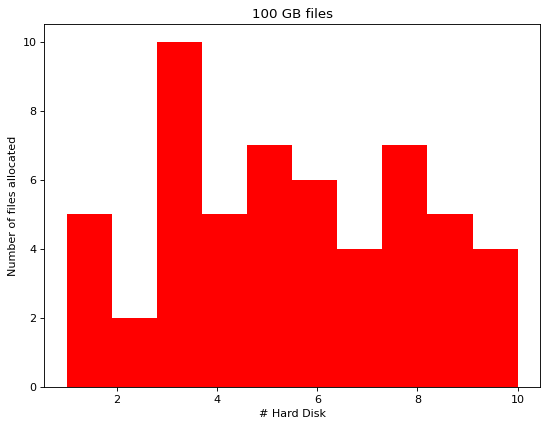

In [ ]:
mean0 , std0, a0 , stop0 = hash_func(10,10,30)

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(a0[0:stop0], color = "red")
plt.xlabel("# Hard Disk")
plt.ylabel("Number of files allocated")
plt.title("100 GB files")
print("Mean = ", mean0)
print("Std.dev = ", std0)

This histogram is the result of a simulation with file of a fixed size of 100GB. This means that once the random generator gives for ten times the same number associated with a certain HD, this one will be full and the simulation ends. Running this simulation for 30 times to reduce statistical fluctuation, the average space used is:

\begin{equation*}
    \begin{array}{c|c|c|c} \hline
  	iteration	&	mean 			&	\sigma	& file \ size	 \\ \hline
       	30	&	60 \%	&	2\% & 100 \ GB	\\ 
    \end{array}
\end{equation*}

In particular the analysis has been done for three other possible dimensions of file, respectively 10GB, 1GB, 4MB. The idea is that using files with small dimension (with respect to the total size of the HDs) is more efficent form the point of view of the used space before completely fill the first HD. The results are the following:


\begin{equation*}
    \begin{array}{c|c|c|c} \hline
  	iteration	&	mean 			&	\sigma	& file \ size	 \\ \hline
       	30	&	85.5\%	&	0.8\% & 10 \ GB	\\ 
       	10	&	94.6\%	&	0.3\% & 1 \ GB	\\ 
       	5	&	99.69\%	&	0.02\% & 4 \ MB	\\ 
    \end{array}
\end{equation*}

It is pretty interesting to look also at the histograms:



Mean =  0.8546333333333334
Std.dev =  0.008330155120020093


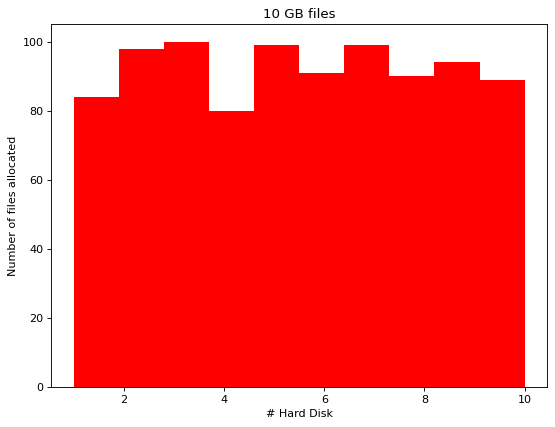

In [ ]:
mean1 , std1, a1 , stop1 = hash_func(10,100,30)

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(a1[0:stop1], color = "red")
plt.xlabel("# Hard Disk")
plt.ylabel("Number of files allocated")
plt.title("10 GB files")
print("Mean = ", mean1)
print("Std.dev = ", std1)

Mean =  0.9460200000000001
Std.dev =  0.0032299333402569423


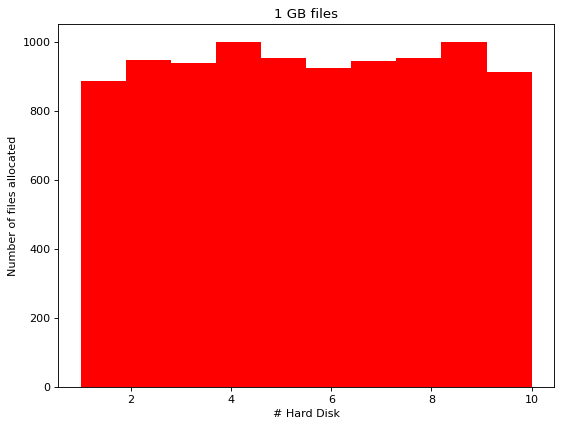

In [ ]:
mean2 , std2, a2, stop2 = hash_func(10,1000,10)

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(a2[0:stop2], color = "red")
plt.xlabel("# Hard Disk")
plt.ylabel("Number of files allocated")
plt.title("1 GB files")
print("Mean = ", mean2)
print("Std.dev = ", std2)

Mean =  0.9969010937499999
Std.dev =  0.0001865817122622155


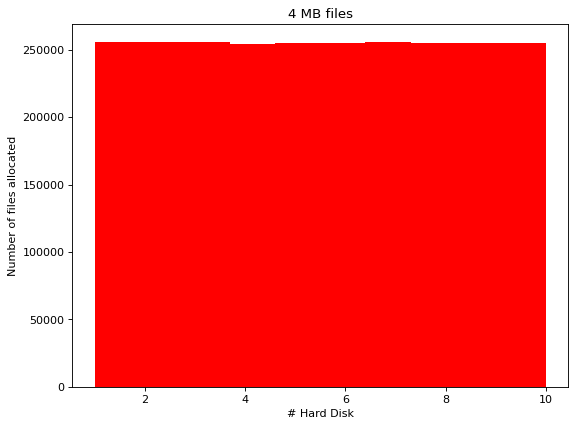

In [ ]:
mean3 , std3, a3, stop3 = hash_func(10,256000,5, start = 2548500 )

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(a3[0:stop3], color = "red")
plt.xlabel("# Hard Disk")
plt.ylabel("Number of files allocated")
plt.title("4 MB files")
print("Mean = ", mean3)
print("Std.dev = ", std3)

It is clear how decreasing the dimesion of the files the plot seems more a flat distibution over the HDs. 
We are not surprised by this. Without entering in sophisticated statistical calculations, it is straightfoward to understand that the number of iterations N needed to fill an HD is much greater if the size of the files is smaller. According to the Law of large numbers, the bigger N is and the more the histograms in the previous figures will tend to the uniform distribution.
Thus, the occupation differences among HDs will be significantly smaller for large number of files, reducing as well the standard deviation.

### 3.2 Increasing the number of HDs

In [ ]:
def gauss(x, mean, sigma):
    dummy1 = np.exp(-(x-mean)**2 / (2*sigma**2) )
    dummy2 = (2 * np.pi * sigma**2)**(-0.5)
    
    return(dummy1*dummy2)

With the same code it is possible to look to how the simulation runs using a different number of HDs. The code that we have implemented concerns a simulation with 1000 HDs and file size of 10GB. The next figure shows the results obtained. 

Mean =  0.65936
Std.dev =  0.08134365617551254


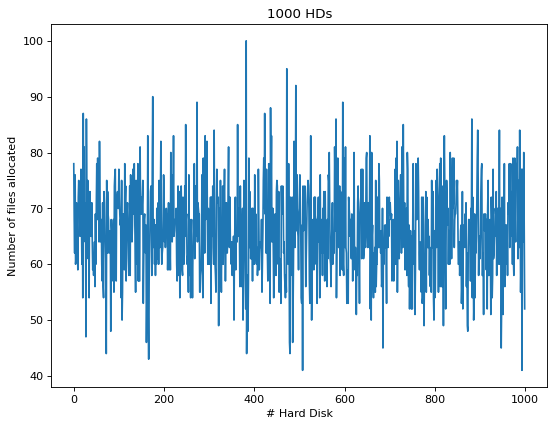

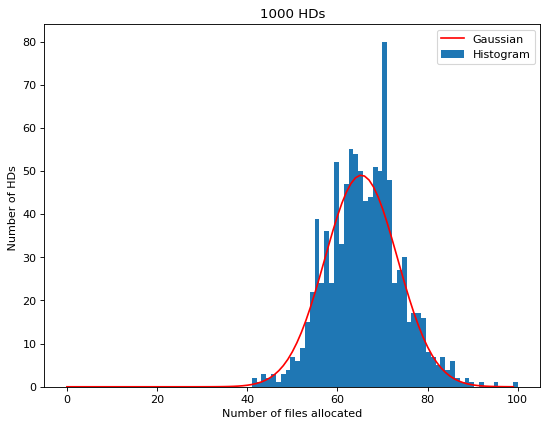

In [ ]:
mean1000 , std1000, a1000 , stop1000 = hash_func(1000,100,1)

stop, _ = np.histogram(a1000[0:stop1000 ],bins=1000)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stop)
plt.xlabel("# Hard Disk")
plt.ylabel("Number of files allocated")
plt.title("1000 HDs")
print("Mean = ", np.mean(stop/100))
print("Std.dev = ", np.std(stop/100))


x = np.linspace(0,100,100)
gaussian = gauss(x,np.mean(stop),np.std(stop) )*1000

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(gaussian,color = "red", label = "Gaussian")
plt.hist(stop, bins = 55, label = "Histogram")
plt.xlabel("Number of files allocated")
plt.ylabel(" Number of HDs  ")
plt.title("1000 HDs")
plt.legend()


Using a greater number of HDs, the simulation ends with an average occupation of $68\%$ and a standard deviation of $ 8 \%$ and the distribution of the occupation over HDs is similar to a gaussian with these paremeters. The average value of occupied space with files of 10 GB is less in the case of a huge number of HDs. This could be due to the fact that at the end of the simulation, in the case of many HDs, there are a lot of them with few files. 

# Exercise 4


## 4.1.1 Use the REST API
The following code steals 100 coins to all the accounts possessing more than 500 coins. Our account is 'LuPi AndAle'.

In [4]:
import requests
import time
import json
from timeit import timeit
import matplotlib.pyplot as plt

In [5]:
url = 'https://pansophy.app:8443'

In [6]:
# Printing a summary of the chain
r = requests.get(url, verify=False)
response=r.json()                                                          #saving the GET response 
accounts = [key for key in response['accounts'].keys()]                    #Saving a vector of all the accounts
coins = [response['accounts'][key] for key in response['accounts'].keys()] #Saving a vector of all the accounts
                                                                           # coins


#printing a recap table of the accounts and their coins   
lenmax= 0

for account in accounts:
    if len(account)>lenmax: lenmax=len(account)

print('ACCOUNTS'+' '*(lenmax-len(account)-1),'|','COINS')
print('-'*2*lenmax)
for i,account in enumerate(accounts):
    print('{}'.format(account)+' '*(lenmax-len(account)),'|',coins[i])
#printing the last three transactions
print('\n\nLast three transactions:')
for i in (-3,-2,-1):
    display(response['chain'][i])

#printing the number of transactions made by us
count = 0
for block in response['chain']:
    if block['team']=='LuPi AndAle':
        count = count +1

print('\nNumber of transactions made by us: {}'.format(count))

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


ACCOUNTS          | COINS
----------------------------------
21centurysboys    | 1701
AC Milan          | 1
Andreas J. Peters | 1
BellaFra          | 1
BellaZio          | 1
CANE              | 996510
FaoTom            | 1
Fogliame          | 1
Giovanni          | 1
GitPush           | 1
LuPi AndAle       | 1766
Oesais            | 1
PM                | 1
PaoloMuschio      | 1
Team1             | 1
bellaZio          | 1
genesis           | 10


Last three transactions:


{'coins': 100,
 'debit': '21centurysboys',
 'index': 2525,
 'my_hash': 'af565539d68c201ccc143dfd44256d2e6d9a88cd29a512859f4d15a35e9dc33d',
 'prev_hash': 'f1f5f0d74fe7e9faff9f3e4b3938ffa33008974793d334069e285b7417c69223',
 'team': 'LuPi AndAle',
 'timestamp': 1623317693.85744}

{'coins': 100,
 'debit': '21centurysboys',
 'index': 2526,
 'my_hash': '4cdac5eaab44f330d186a59f4bccc18e96610a59ba130ecb912c9506b4f516fd',
 'prev_hash': 'af565539d68c201ccc143dfd44256d2e6d9a88cd29a512859f4d15a35e9dc33d',
 'team': 'LuPi AndAle',
 'timestamp': 1623317707.317521}

{'coins': 100,
 'debit': '21centurysboys',
 'index': 2527,
 'my_hash': '025da6a05e8314a96d03ddce03d9b160a1d39ff2a900c854e320f65bc632f314',
 'prev_hash': '4cdac5eaab44f330d186a59f4bccc18e96610a59ba130ecb912c9506b4f516fd',
 'team': 'LuPi AndAle',
 'timestamp': 1623317721.013779}


Number of transactions made by us: 254


In [7]:
#getting a list of the accounts without ours (competitors) and their coins (competitors_coin)
competitors = []
competitors_coins = []
for element in accounts:
    if element != 'LuPi AndAle':
        competitors.append(element)
        competitors_coins.append(response['accounts'][element])

In [9]:
for i,competitor in enumerate(competitors):
    if competitors_coins[i]>500:
        post_data = {
            "operation": "merit",
            "team": "LuPi AndAle",
            "coin": 100,
            "stealfrom":competitor
        }
        
        r_post = requests.post(url,json=post_data,verify=False)   # calling the merit function
        
        time.sleep(10.5)                                          # waiting the proof of time
        
        claim_data = {
            "operation": "claim",
            "team": "LuPi AndAle"
        }
        
        r_claim = requests.post(url,json=claim_data,verify=False) #calling the claim function

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: Insecure

In [10]:
# Printing a summary of the chain
r = requests.get(url, verify=False)
response=r.json()                                                          #saving the GET response 
accounts = [key for key in response['accounts'].keys()]                    #Saving a vector of all the accounts
coins = [response['accounts'][key] for key in response['accounts'].keys()] #Saving a vector of all the accounts
                                                                           # coins


#printing a recap table of the accounts and their coins   
lenmax= 0

for account in accounts:
    if len(account)>lenmax: lenmax=len(account)

print('ACCOUNTS'+' '*(lenmax-len(account)-1),'|','COINS')
print('-'*2*lenmax)
for i,account in enumerate(accounts):
    print('{}'.format(account)+' '*(lenmax-len(account)),'|',coins[i])
#printing the last three transactions
print('\n\nLast three transactions:')
for i in (-3,-2,-1):
    display(response['chain'][i])

#printing the number of transactions made by us
count = 0
for block in response['chain']:
    if block['team']=='LuPi AndAle':
        count = count +1

print('\nNumber of transactions made by us: {}'.format(count))

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


ACCOUNTS          | COINS
----------------------------------
21centurysboys    | 1601
AC Milan          | 1
Andreas J. Peters | 1
BellaFra          | 1
BellaZio          | 1
CANE              | 996410
FaoTom            | 1
Fogliame          | 1
Giovanni          | 1
GitPush           | 1
LuPi AndAle       | 1966
Oesais            | 1
PM                | 1
PaoloMuschio      | 1
Team1             | 1
bellaZio          | 1
genesis           | 10


Last three transactions:


{'coins': 100,
 'debit': '21centurysboys',
 'index': 2527,
 'my_hash': '025da6a05e8314a96d03ddce03d9b160a1d39ff2a900c854e320f65bc632f314',
 'prev_hash': '4cdac5eaab44f330d186a59f4bccc18e96610a59ba130ecb912c9506b4f516fd',
 'team': 'LuPi AndAle',
 'timestamp': 1623317721.013779}

{'coins': 100,
 'debit': '21centurysboys',
 'index': 2528,
 'my_hash': 'ada53898825e2883cd3e298e0aca9e1f6c794250b90b40fad25b741d237a3cfe',
 'prev_hash': '025da6a05e8314a96d03ddce03d9b160a1d39ff2a900c854e320f65bc632f314',
 'team': 'LuPi AndAle',
 'timestamp': 1623321087.839084}

{'coins': 100,
 'debit': 'CANE',
 'index': 2529,
 'my_hash': 'c24d87651332e71072f67ec2d5f3ccdec8425af1dabc76576da42ca2f45ae404',
 'prev_hash': 'ada53898825e2883cd3e298e0aca9e1f6c794250b90b40fad25b741d237a3cfe',
 'team': 'LuPi AndAle',
 'timestamp': 1623321098.716694}


Number of transactions made by us: 256


## 4.1.2 What is the maximum number of transactions one given team can add to the Block Chain in one day?

Given the fact that the server implements a Proof-of-Time algorithm which prevents to send a claim request before at least 10 seconds are passed from the merit request, the maximum number of transactions a team can add to the block chain are (in the ideal limit of zero-time request address):
 $$\dfrac{seconds\:in\:a\:day}{Proof\:of\:Time\:wait}=\dfrac{24\cdot60\cdot60}{10}=\dfrac{86400}{10}=8640\;transactions/day$$

## 4.2.1 Explain what the function that computes the hash of a block does and why is this ‘the key’ for Block Chain technology.

This function computes the cryptografic hash of the contents of a block.
In particular, the function at first puts all the blocks informations into a 'block_of_string' string. Then the 'block_of_string' is encoded by representing each character of the string with 1 byte (UTF-8 encoding). Finally the hexadecimal digest computed by sha-256 algorithm is returned. 

This function is the key of the block chain technology because it allows to achieve security in blockchains: every block is characterized by an hash that relies on the hash of the previous block.
This mechanism allows to avoid the tempering of any block of the chain since every change in the block leads to a completely new hash. Hence, it is straightforward to evaluate the validity of the chain by checking that in the sequence of hashes each element relies well on the previous one. 

## 4.2.2 If you have the knowledge of the hash function, how can you validate the contents of the Block Chain you received using a GET request to make sure, nobody has tampered with it?

Having the knoledge of the hash function we can verify the Block Chain going trough all blocks and verifying the consistency of the included hash value in the block with the one of its predecessors. Practically speaking we go down trough the chain starting from the bottom and check the agreement of the hash function of a block and the one of its predecessor (this check can be done for instance by means of an if statement). 

## 4.2.3 Why might the GET REST API run into scalability problems? Express the scalability behaviour of execution times of GET and POST requests in Big O notation in relation to the number of transactions recorded in the Block Chain! Draw execution time vs transactions for GET and POST requests.

The GET REST API returns the whole set of transactions that have occured in the chain, with detailed data. As a result, the longer the chain gets the more data will be available and hence the larger amount of resources and time will be needed to perform this operation. From a technical point of view, the execution time of GET grows linearly with the length $N$ of the chain ($\mathcal{O}(N)$). 

On the other hand, the POST operation regards the single transaction we want to submit and therefore the execution time is independent of the chain length ($\mathcal{O}(1)$). \
\
The following graphs is obtained by doing 100 transactions: each transaction steals 10 coins to "genesis". At every iteration we measure GET and POST execution time and store them. We then plot both of them as a function of chain length.\
We show the code we used below the graph.

In [ ]:
url = 'https://pansophy.app:8443'

post_times = []            #list of POST execution times
get_times = []             #list of GET execution times
transactions_indexes = []  #list of blocks indexes
for i in range (0,150):
    print(i)
    post_data = {
            "operation": "merit",
            "team": "LuPi AndAle",
            "coin": 10,
            "stealfrom": "genesis"
    }
        
    start_time_post = time.time()                           #
    r_post = requests.post(url,json=post_data,verify=False) #Measurign POST execution time
    end_time_post = time.time()                             #
    post_times.append(end_time_post-start_time_post)        #Saving POST execution time
        
    time.sleep(10)
        
    claim_data = {
        "operation": "claim",
        "team": "LuPi AndAle"
    }
        
    r_claim = requests.post(url,json=claim_data,verify=False)
        
    start_time_get = time.time()                  #
    r_get = requests.get(url, verify=False)       #Measuring GET execution time
    end_time_get = time.time()                    #
        
    get_times.append(end_time_get-start_time_get) #Saving GET execution time
    transactions_indexes.append(r_get.json()['chain'][-1]['index'])

In [ ]:
#Plotting the graph
fig = plt.figure(figsize=(12,8))
plt.plot(transactions_indexes,post_times,label='POST execution time')
plt.plot(transactions_indexes,get_times,label='GET execution time')
plt.xlabel('#Number of transactions',size=20)
plt.ylabel('seconds',size=20)
plt.legend(loc='best',title="Execution Times",title_fontsize= 18,prop={'size':16})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(linestyle='--')
plt.show()

Here the plot we obtained together with the theoretical expectations (note: performing the GET and POST operations 100 times requires a non trivial amount of time, hence we report in here the plot obtained by a previous run of the code above).

![Execution time vs chain length and expectations](Exe_times.png)

## 4.2.4 If the Crypto server goes down, the way it is implemented it loses the current account balances. How can the server recompute the account balances after a restart from the saved Block Chain?

Assuming that the Block Chain is available, the account balances at a certain point of the chain can simply be reconstructed by the server by running across the chain again from the very beginning. This can be done if the initial conditions are known (i.e., 1M coins stored in the "genesis" team for this example) and if the chain is uncorrupted (or eventually restored). Given the fact that also in our personal experience while preparing this project the server has been down multiple times, we believe the wallets at the end of the chain have been recollected in this way.

## 4.2.5 What are the advantages of using a REST API and JSON in a client-server architecture? What are possible disadvantages?

A REST API is expecially powerful because of its scalability, which is enhanced in a separed server-client framework. Moreover, in this scenario it also helps running the protocol on various platforms and projects. Finally, it is also relatively easy to learn and use, deals well with high loads and supports the standard HTTP. On the other hand, it lacks the presence of stateful mechanisms and more importantly is weak when it comes to security (hence, is not optimal when dealing with confidential data). As for JSON, it can count on simple usage because of the user-friendly sintax which results in code which is easily readable from both the human and machine points of view. It is also easy to interface this format with several languages for data management and it supports arrays. Cons are the fact that it only supports UTF-8 encoding and that it offers little protection to data.